In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE, LocallyLinearEmbedding, SpectralEmbedding, Isomap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from umap import UMAP
from openTSNE import TSNE

c:\Users\Daniel\Documents\GitHub\zindi-soil-hyperspectral\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
X = np.loadtxt("../data/interim/X_train.txt", delimiter=" ")
y = np.loadtxt("../data/interim/y_train.txt", delimiter=" ")
newdata = np.loadtxt("../data/interim/X_test.txt", delimiter=" ")

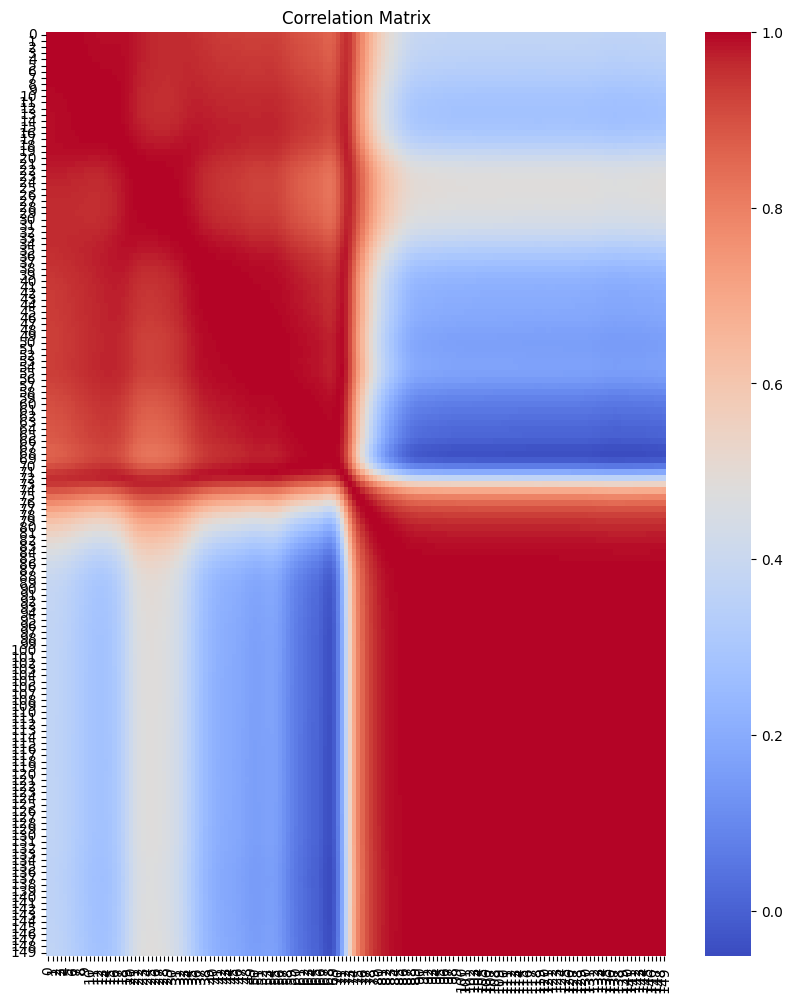

In [3]:
# Assuming you have a numpy array named 'data' with shape (n_obs, n_features)
# Compute the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            xticklabels=range(X.shape[1]), yticklabels=range(X.shape[1]))
plt.title('Correlation Matrix')
plt.show()

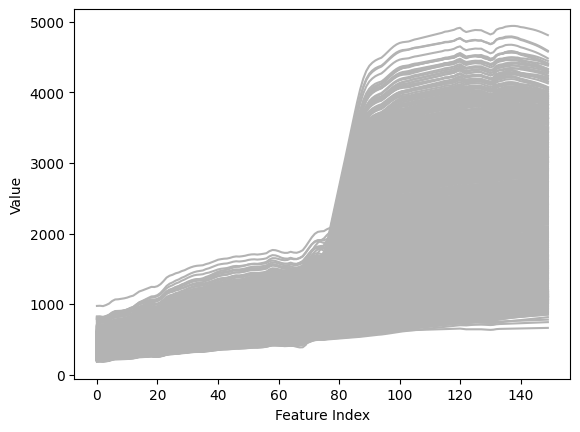

In [6]:
subsample_indices = np.random.choice(X.shape[0], size=100, replace=False)
subsample_data = X[subsample_indices, :]

# Create a figure and axis object
fig, ax = plt.subplots()

# Loop over each observation
for i in range(X.shape[0]):
    # Plot the i-th observation as a line
    ax.plot(range(X.shape[1]), X[i, :], color='0.7')

# Add labels and legend
ax.set_xlabel('Feature Index')
ax.set_ylabel('Value')

# Show the plot
plt.show()

In [5]:
# Assuming 'X' is your feature matrix (2D array), where rows are samples and columns are features
# Make sure your data is numeric and standardized (mean=0, std=1) for PCA to work effectively

# Step 1: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform PCA
# n_components determines the number of principal components to keep
# If you're unsure, you can set it to None, which keeps all components
pca = PCA(n_components=None)  
X_pca = pca.fit_transform(X_scaled)

# After fitting the PCA model, 'X_pca' will contain the transformed features

# If you want to specify a number of components, you can do something like this:
# pca = PCA(n_components=5)  # Keep the top 5 components

# Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var_ratio = np.cumsum(explained_var_ratio)

# This provides a measure of how much information is retained by each component and cumulatively

# Optionally, you can choose the number of components based on explained variance
# For example, if you want to retain 95% of the variance
n_components = np.argmax(cumulative_explained_var_ratio >= 0.99) + 1

# Apply PCA with the chosen number of components
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X_scaled)

In [6]:
cumulative_explained_var_ratio[1:20]

array([0.99104382, 0.99687794, 0.99958888, 0.99978958, 0.99989386,
       0.9999272 , 0.99995406, 0.99997411, 0.9999803 , 0.99998496,
       0.9999889 , 0.99999131, 0.99999342, 0.99999447, 0.99999536,
       0.99999612, 0.99999662, 0.99999706, 0.99999747])

In [7]:
# Assuming 'X' is your feature matrix (2D array), where rows are samples and columns are features
# Make sure your data is numeric and standardized (mean=0, std=1) for t-SNE to work effectively

# Step 1: Standardize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform t-SNE
# n_components determines the number of dimensions in the embedded space (typically 2 for visualization)
tsne = TSNE(n_components=2, random_state=42)  
X_tsne = tsne.fit_transform(X_scaled)

# After fitting the t-SNE model, 'X_tsne' will contain the transformed features

# 'X_tsne' now contains the reduced dimensional representation of your data.

# Optionally, you can choose other parameters, like perplexity and learning rate
# Perplexity controls the balance between local and global aspects of your data
# Higher values tend to consider more points in the calculation. Try different values to see what works best for your data.
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

# You can then use X_tsne for visualization or any downstream analysis.
X_tsne.shape

(1732, 2)

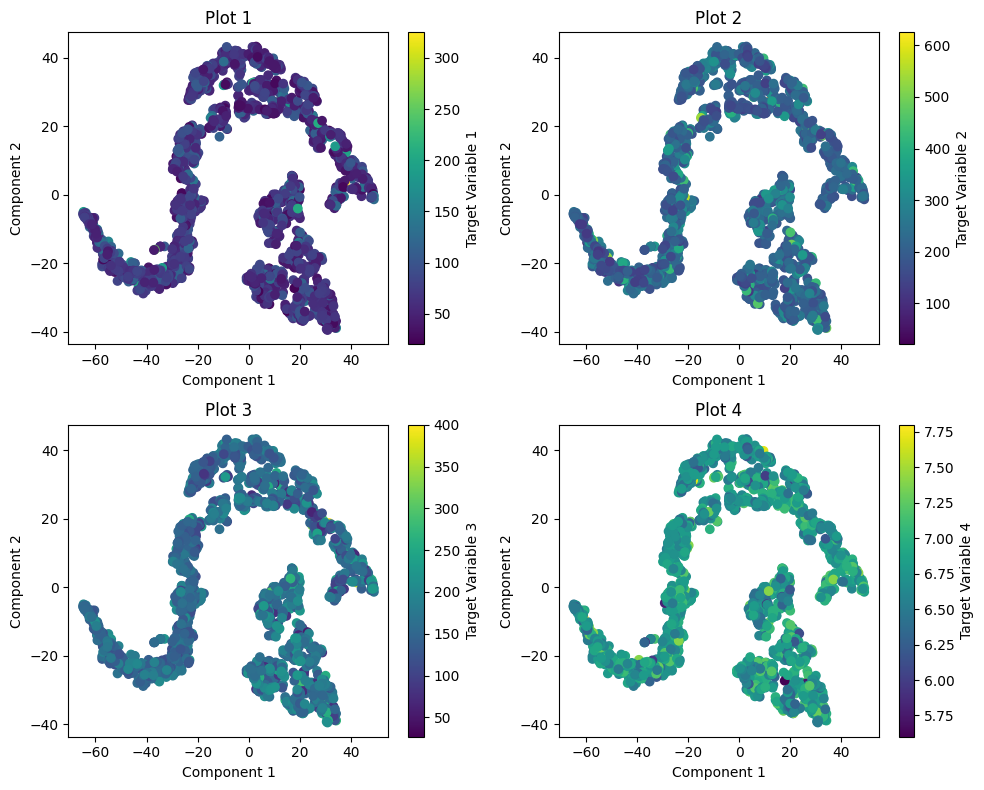

In [8]:
# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each target vector and create a scatter plot
for i, y_i in enumerate(ys):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_i[:, 0], cmap='viridis')
    plt.colorbar(label=f'Target Variable {i+1}')
    plt.title(f'Plot {i+1}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
tsne = TSNE(n_components=3, random_state=42)  
X_tsne = tsne.fit_transform(X_scaled)

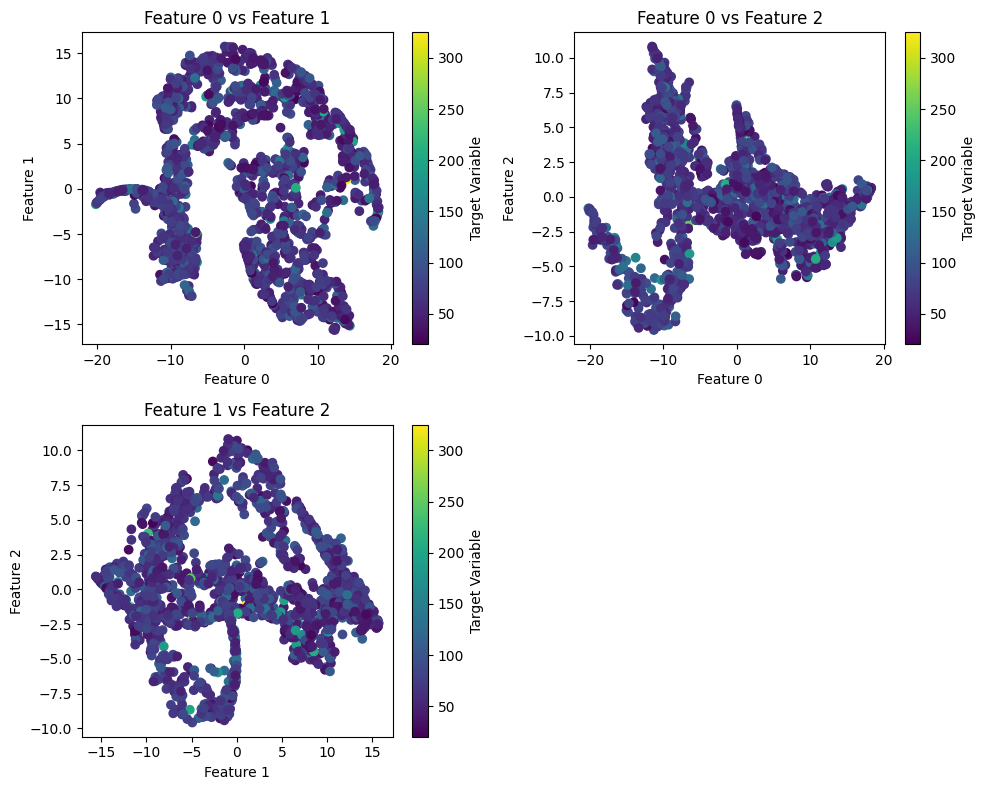

In [10]:
# Define the features you want to compare (e.g., feature 0 vs feature 1, feature 0 vs feature 2, etc.)
feature_pairs = [(0, 1), (0, 2), (1, 2)]

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through the feature pairs and create scatter plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_tsne[:, feature1], X_tsne[:, feature2], c=y[:, 0], cmap='viridis')
    plt.title(f'Feature {feature1} vs Feature {feature2}')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.colorbar(label='Target Variable')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# data = np.vstack([X, newdata])
    
# scaler = StandardScaler().fit(X=X)
# data = scaler.transform(X=data)

# # Perform t-SNE
# # n_components determines the number of dimensions in the embedded space
# tsne = TSNE(n_components=10, method='exact', random_state=298374)  
# X_tsne = tsne.fit_transform(data)

# split_idx = X.shape[0]  # Get the index to split the array
# print(X_tsne[:split_idx].shape)

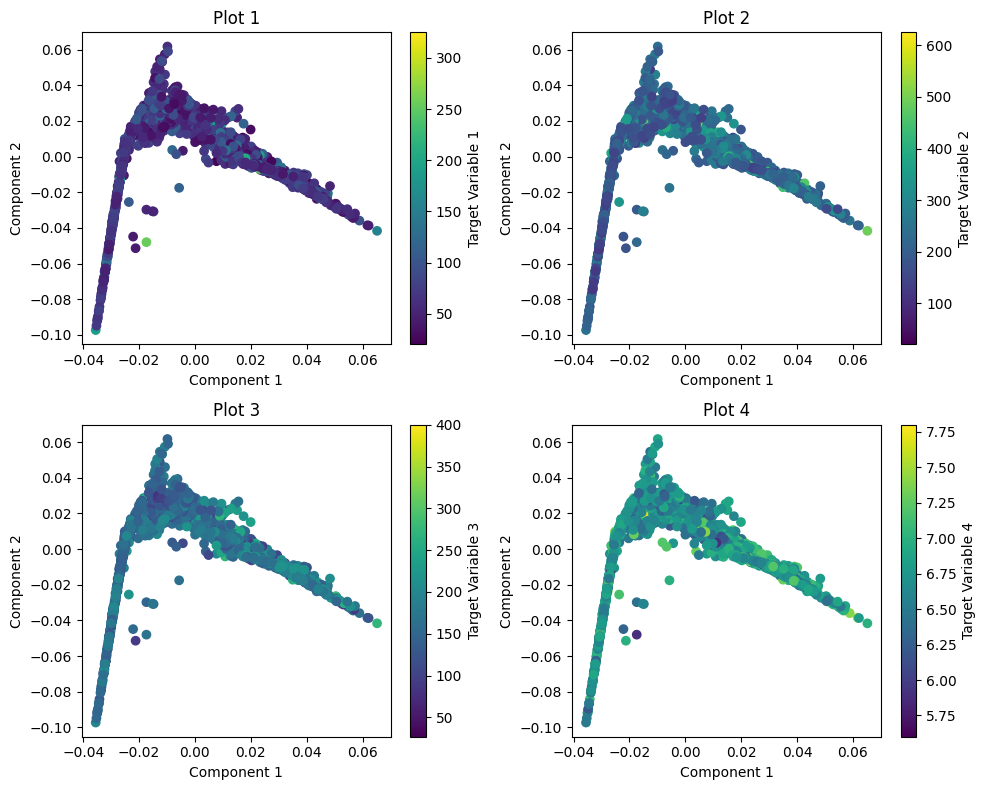

In [12]:
# Locally linear embeddings
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=454564)  
X_lle = lle.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each target vector and create a scatter plot
for i, y_i in enumerate(ys):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_i[:, 0], cmap='viridis')
    plt.colorbar(label=f'Target Variable {i+1}')
    plt.title(f'Plot {i+1}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

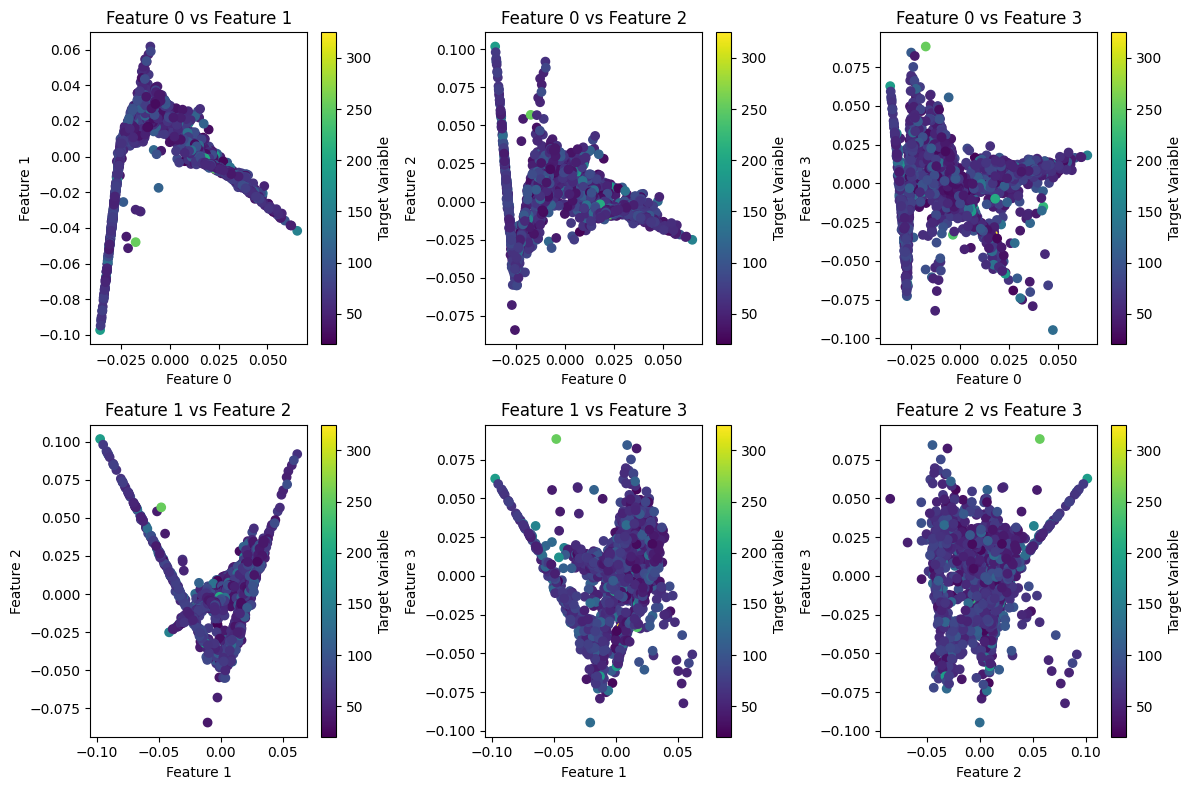

In [13]:
# Locally linear embeddings
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=4, random_state=454564)  
X_lle = lle.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Define the features you want to compare (e.g., feature 0 vs feature 1, feature 0 vs feature 2, etc.)
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a figure
plt.figure(figsize=(12, 8))

# Loop through the feature pairs and create scatter plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(2, 3, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_lle[:, feature1], X_lle[:, feature2], c=y[:, 0], cmap='viridis')
    plt.title(f'Feature {feature1} vs Feature {feature2}')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.colorbar(label='Target Variable')

# Adjust layout
plt.tight_layout()
plt.show()

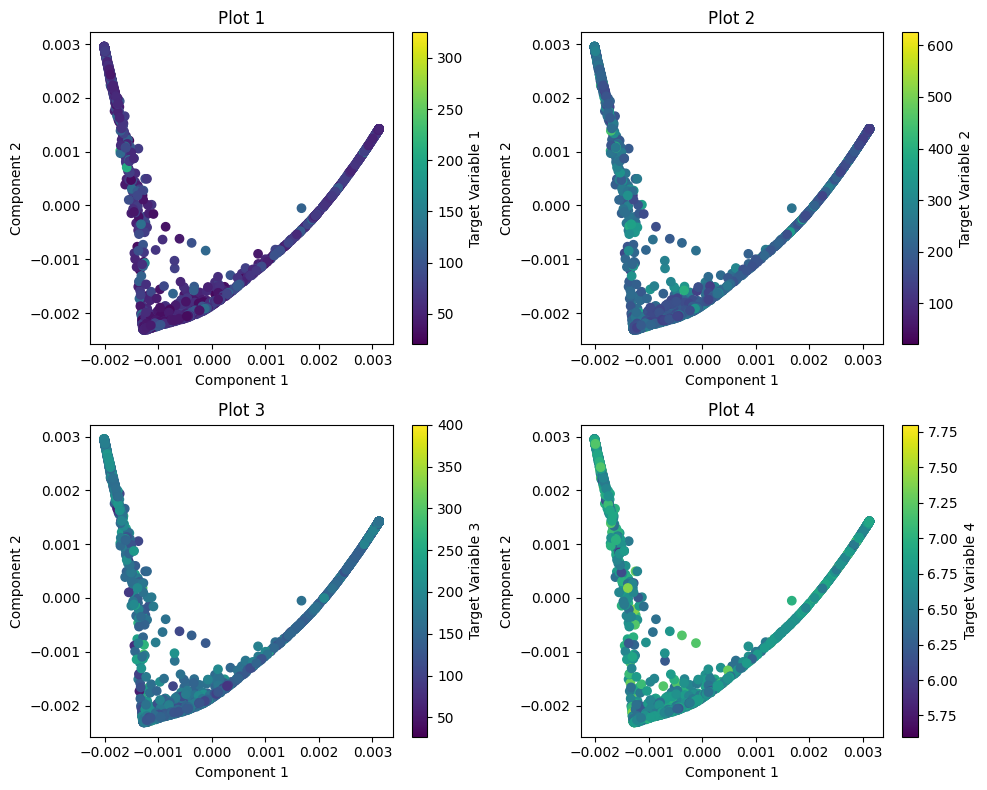

In [14]:
# Spectral embeddings
embedding  = SpectralEmbedding(n_components=2, random_state=454564)  
X_spectral = embedding .fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each target vector and create a scatter plot
for i, y_i in enumerate(ys):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c=y_i[:, 0], cmap='viridis')
    plt.colorbar(label=f'Target Variable {i+1}')
    plt.title(f'Plot {i+1}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

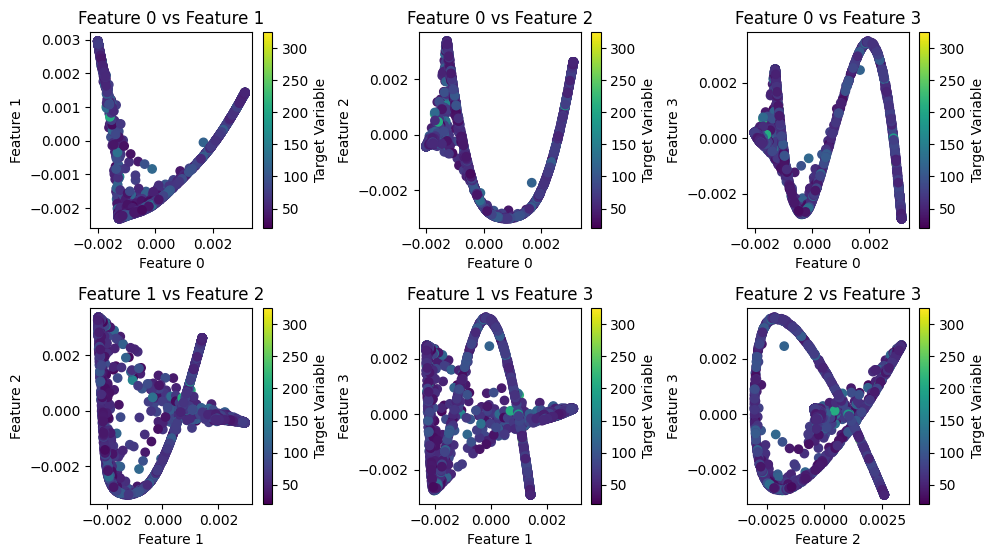

In [15]:
# Spectral embeddings
embedding = SpectralEmbedding(n_components=4, random_state=454564)  
X_spectral = embedding.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Define the features you want to compare (e.g., feature 0 vs feature 1, feature 0 vs feature 2, etc.)
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through the feature pairs and create scatter plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_spectral[:, feature1], X_spectral[:, feature2], c=y[:, 0], cmap='viridis')
    plt.title(f'Feature {feature1} vs Feature {feature2}')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.colorbar(label='Target Variable')

# Adjust layout
plt.tight_layout()
plt.show()

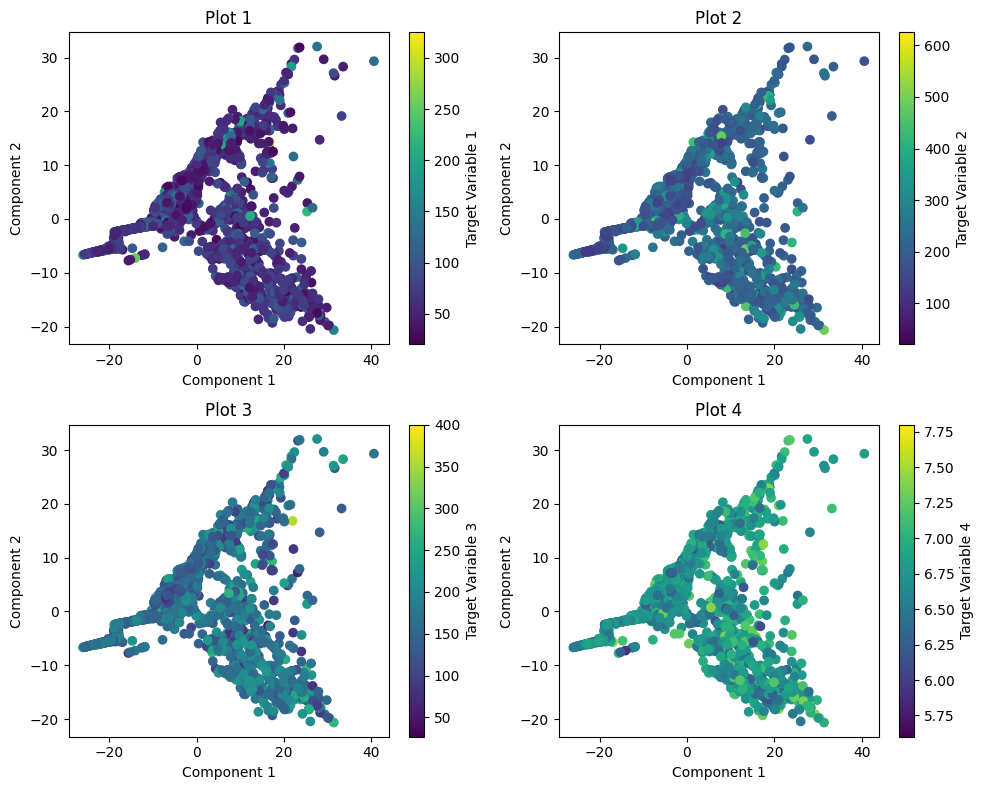

In [16]:
# Spectral embeddings
embedding  = Isomap(n_neighbors=5, n_components=2)  
X_iso = embedding.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each target vector and create a scatter plot
for i, y_i in enumerate(ys):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_i[:, 0], cmap='viridis')
    plt.colorbar(label=f'Target Variable {i+1}')
    plt.title(f'Plot {i+1}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

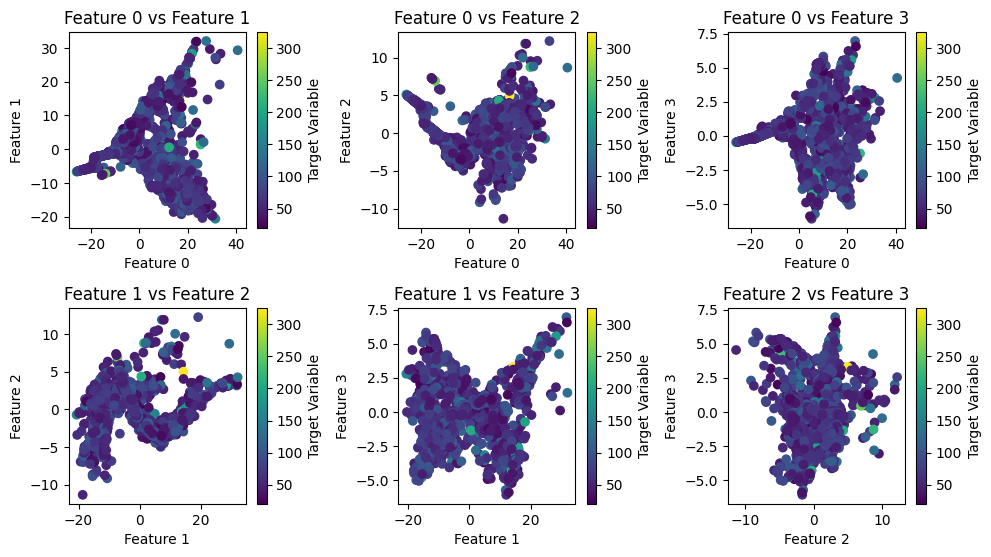

In [17]:
# Spectral embeddings
embedding = Isomap(n_neighbors=5, n_components=4)  
X_iso = embedding.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Define the features you want to compare (e.g., feature 0 vs feature 1, feature 0 vs feature 2, etc.)
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through the feature pairs and create scatter plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_iso[:, feature1], X_iso[:, feature2], c=y[:, 0], cmap='viridis')
    plt.title(f'Feature {feature1} vs Feature {feature2}')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.colorbar(label='Target Variable')

# Adjust layout
plt.tight_layout()
plt.show()

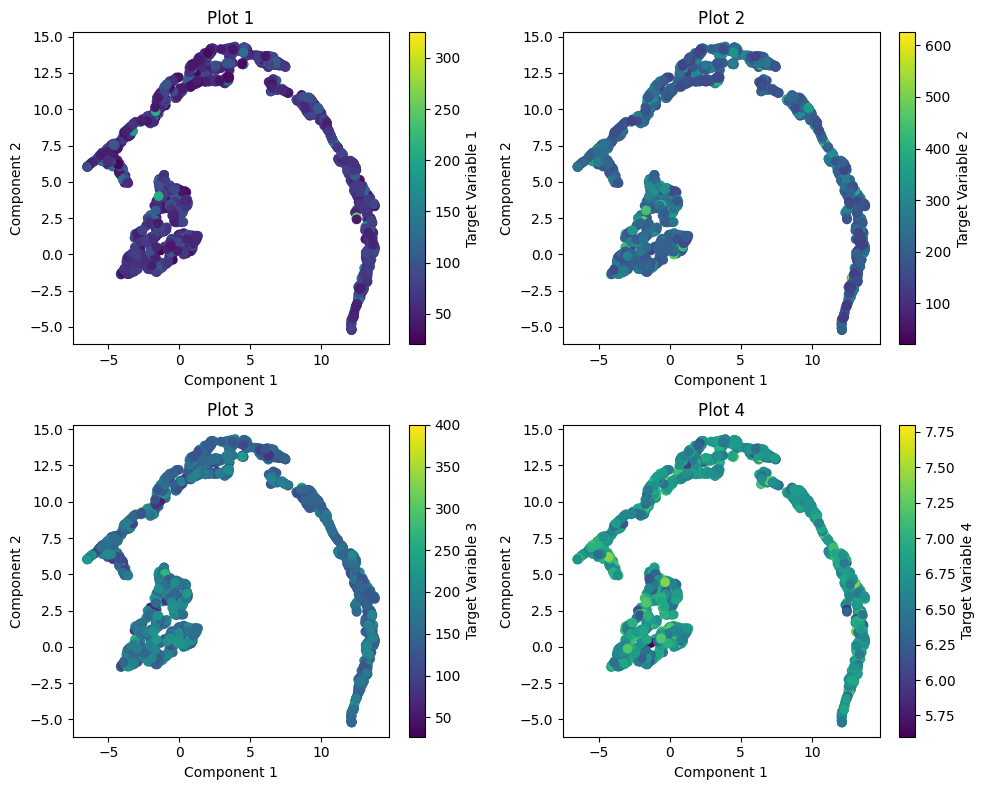

In [18]:
# Uniform Manifold Approximation and Projection for Dimension Reduction
reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through each target vector and create a scatter plot
for i, y_i in enumerate(ys):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_i[:, 0], cmap='viridis')
    plt.colorbar(label=f'Target Variable {i+1}')
    plt.title(f'Plot {i+1}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

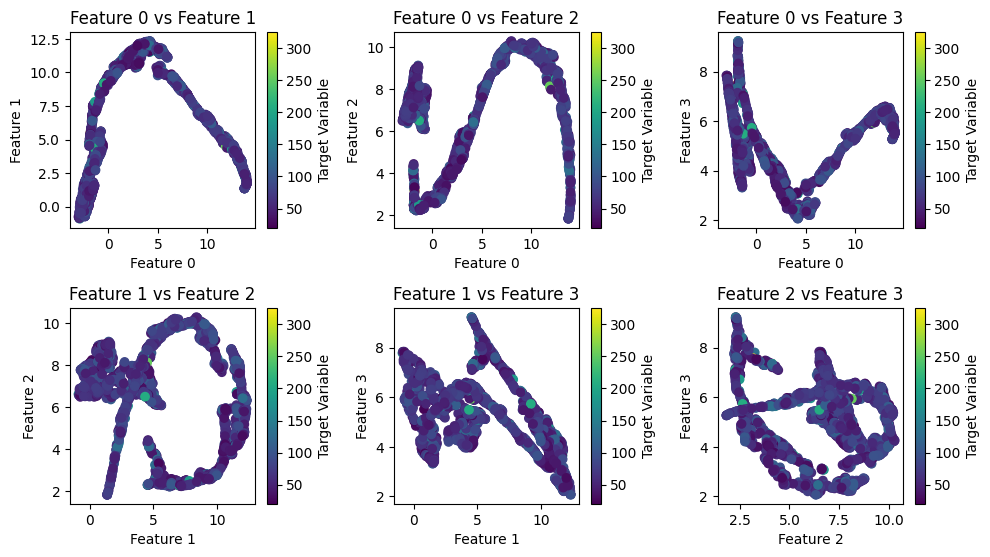

In [20]:
reducer = umap.UMAP(n_components=4)
X_umap = reducer.fit_transform(X_scaled)

# Create a list of target vectors (one for each column in y)
ys = np.hsplit(y, y.shape[1])

# Define the features you want to compare (e.g., feature 0 vs feature 1, feature 0 vs feature 2, etc.)
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a figure
plt.figure(figsize=(10, 8))

# Loop through the feature pairs and create scatter plots
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid size as needed
    plt.scatter(X_umap[:, feature1], X_umap[:, feature2], c=y[:, 0], cmap='viridis')
    plt.title(f'Feature {feature1} vs Feature {feature2}')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.colorbar(label='Target Variable')

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
def get_embeddings(X, newdata1=None, newdata2=None):
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X=X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X=X)
    
    umap = UMAP(n_neighbors=15, n_components=3, random_state=0, n_jobs=1)
    X_umap = umap.fit_transform(X=X)
    
    tsne = TSNE(n_components=3, random_state=0)
    X_tsne = tsne.fit(X=X)
    
    X_embedded = np.hstack((X_pca, X_umap, X_tsne))
    
    if newdata1 is not None:
        newdata1 = scaler.transform(newdata1)
        newdata1_pca = pca.transform(newdata1)
        newdata1_umap = umap.transform(newdata1)
        newdata1_tsne = tsne.transform(newdata1)
        newdata_embedded1 = np.hstack((newdata1_pca, newdata1_umap, newdata1_tsne))
    else:
        newdata_embedded1 = None
        
    if newdata2 is not None:
        newdata2 = scaler.transform(newdata2)
        newdata2_pca = pca.transform(newdata2)
        newdata2_umap = umap.transform(newdata2)
        newdata2_tsne = tsne.transform(newdata2)
        newdata_embedded2 = np.hstack((newdata2_pca, newdata2_umap, newdata2_tsne))
    else:
        newdata_embedded2 = None
    
    if newdata1 is None and newdata2 is None: 
        return X_embedded
    
    elif newdata2 is None and newdata1 is not None: 
        return X_embedded, newdata_embedded1
    
    else: 
        return X_embedded, newdata_embedded1, newdata_embedded2

In [15]:
test = get_embeddings(X)

In [16]:
test

array([[  2.62527909,   6.92962654,  -0.65531534, ...,  20.01787142,
         30.6410498 ,  -3.11992499],
       [ 12.87043574,   1.81060309,  -1.6159637 , ...,  38.85105106,
         -0.26174753,   0.70219883],
       [ -3.4348291 ,   5.06796518,   2.7302742 , ..., -10.68684714,
         34.3105734 ,  -8.1008076 ],
       ...,
       [ -0.24746742,   5.61426714,   0.90377009, ...,   9.42751037,
         40.07896049,  -2.8309918 ],
       [ -2.45780616,   4.23757819,   2.33110666, ...,  -4.46531461,
         41.51165517,  -3.30780963],
       [ -1.16858683,   5.15169105,   1.36953878, ...,   4.62399641,
         41.92628326,  -4.13065021]])